In [4]:
import os
os.getcwd()
os.chdir('anaconda3\envs\ml-zoomcamp\data') #change dir

In [2]:
import numpy as np
import pandas as pd

'1.2.4'

In [5]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(n = 10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


EDA

    Load the data.
    Look at the price variable. Does it have a long tail?

Features

For the rest of the homework, you'll need to use only these columns:

    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'

Select only them.

<AxesSubplot:xlabel='price', ylabel='Count'>

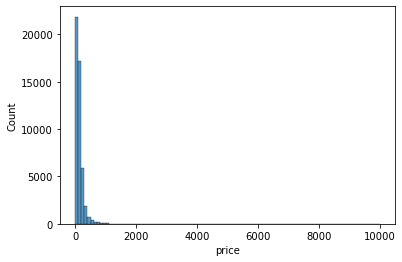

In [9]:
sns.histplot(df.price, bins = 100)

<AxesSubplot:xlabel='price', ylabel='Count'>

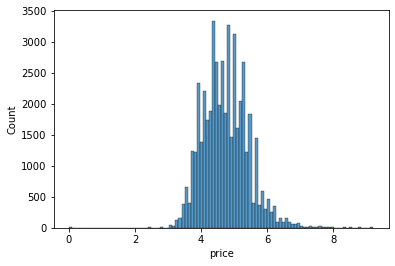

In [12]:
price_logs = np.log1p(df.price)
sns.histplot(price_logs, bins = 100)

In [38]:
# Question 1
base = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
data = df[base]
data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [19]:
# Question 2
data['minimum_nights'].mean()

7.029962163820431

In [36]:
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
#n_val, n_test, n_train
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train + n_val]]
data_test = data.iloc[idx[n_train + n_val:]]
#data_val.head()
#len(data_train), len(data_val), len(data_test)
data_train = data_train.reset_index(drop = True)
data_val = data_val.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)
y_train = np.log1p(data_train.price.values)
y_val = np.log1p(data_val.price.values)
y_test = np.log1p(data_test.price.values)
#y_train
del data_train['price']
del data_val['price']
del data_test['price']
#data_train.head()

In [54]:
data_train.iloc[10]

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# Question 3
med = data_train['reviews_per_month'].mean()
#print(med)
X_train_zero = data_train.fillna(0)
X_train_med = data_train.fillna(med)

w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
y_pred_zero = w0_zero + X_train_zero.dot(w_zero)

w0_med, w_med = train_linear_regression(X_train_med, y_train)
y_pred_med = w0_med + X_train_med.dot(w_med)

rmse(y_train, y_pred_zero), rmse(y_train, y_pred_med)

1.3685492094777056


(0.6428860484860405, 0.6429347474014201)

In [59]:
med = data_val['reviews_per_month'].mean()
#print(med)
X_val_zero = data_val.fillna(0)
X_val_med = data_val.fillna(med)

y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
y_pred_med = w0_med + X_val_med.dot(w_med)

round(rmse(y_val, y_pred_zero), 2), round(rmse(y_val, y_pred_med), 2)

0.6430337788640703 0.642753584768737


(0.64, 0.64)

In [62]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# Question 4
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w0 + X_val_zero.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, round(score,2))

0 -419.9126568379373 0.64
1e-06 -419.86271399655277 0.64
0.0001 -414.97649066284816 0.64
0.001 -375.27365106024024 0.64
0.01 -191.78384011508263 0.66
0.1 -32.562560530502715 0.68
1 -3.499216833056677 0.68
5 -0.7033623169370189 0.68
10 -0.351276757646221 0.68


In [70]:
# Question 5
scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    np.random.shuffle(idx)
    
    data_train = data.iloc[idx[:n_train]]
    data_val = data.iloc[idx[n_train:n_train + n_val]]
    data_test = data.iloc[idx[n_train + n_val:]]
    data_train = data_train.reset_index(drop = True)
    data_val = data_val.reset_index(drop = True)
    data_test = data_test.reset_index(drop = True)

    y_train = np.log1p(data_train.price.values)
    y_val = np.log1p(data_val.price.values)
    y_test = np.log1p(data_test.price.values)

    del data_train['price']
    del data_val['price']
    del data_test['price']
    
    X_train_zero = data_train.fillna(0)
    X_val_zero = data_val.fillna(0)
    
    
    w0, w = train_linear_regression(X_train_zero, y_train)
    y_pred = w0 + X_train_zero.dot(w)
    score = rmse(y_train, y_pred)
    print('Train: ', s, w0, score)
    
    y_pred = w0 + X_val_zero.dot(w)
    score = rmse(y_val, y_pred)
    print('Val:   ', s, w0, score)
    scores.append(score)
    print()
print(scores)
round(np.std(scores),3)

Train:  0 -425.1064770259674 0.6467276217331933
Val:    0 -425.1064770259674 0.6416856765658132

Train:  1 -420.80371340254226 0.6462149780930897
Val:    1 -420.80371340254226 0.6377466012288078

Train:  2 -430.5374464261423 0.6415578380663896
Val:    2 -430.5374464261423 0.6606066763604124

Train:  3 -428.5459550378132 0.6436746591494581
Val:    3 -428.5459550378132 0.6475267750076018

Train:  4 -426.52100847146926 0.6472087332491776
Val:    4 -426.52100847146926 0.6336296341504336

Train:  5 -422.3927093195778 0.6439202562808003
Val:    5 -422.3927093195778 0.6449202271893645

Train:  6 -422.78766507812963 0.6490900071446889
Val:    6 -422.78766507812963 0.6337212411527501

Train:  7 -422.36750343593746 0.6445215227046491
Val:    7 -422.36750343593746 0.6436784541170923

Train:  8 -409.0040830859007 0.6481750705292361
Val:    8 -409.0040830859007 0.6413977478283553

Train:  9 -413.4742615786847 0.6460942318166356
Val:    9 -413.4742615786847 0.6429286006757158

[0.6416856765658132, 0

0.007

In [71]:
# Question 6
np.random.seed(9)
np.random.shuffle(idx)
    
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train + n_val]]
data_test = data.iloc[idx[n_train + n_val:]]
data_train = data_train.reset_index(drop = True)
data_val = data_val.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)

y_train = np.log1p(data_train.price.values)
y_val = np.log1p(data_val.price.values)
y_test = np.log1p(data_test.price.values)

del data_train['price']
del data_val['price']
del data_test['price']

data_full_train = pd.concat([data_train, data_val])
data_full_train = data_full_train.reset_index(drop=True)
X_full_train = data_full_train.fillna(0)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

X_test = data_test.fillna(0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score


0.6510633056617507